<a href="https://colab.research.google.com/github/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis/blob/main/Twitter_Sentiment_P1_19_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis Climate Change

Challenge and data adquired from: https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset?datasetId=413654

GitHub Repository: https://github.com/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis



Tasks to follow: 
1. Create a code that loads and processes the data. 

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/REDi-school-ff22-Data-cycle/twitter-sentiment-analysis/main/twitter_sentiment_data.csv'
df = pd.read_csv(url)
df.head(5)



,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [ ]:
# Exploring the dataset 
df.shape

(43943, 3)

In [ ]:
sentiment_count =df['sentiment'].value_counts().to_frame()
sentiment_count

percentage = (sentiment_count * 100) / df.shape[0]
percentage 

,sentiment
1,52.254056
2,21.109164
0,17.556835
-1,9.079944


In [ ]:
df.describe()

,sentiment,tweetid
count,43943.000000,4.394300e+04
mean,0.853924,8.367966e+17
std,0.853543,8.568506e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970376e+17
50%,1.000000,8.402301e+17
75%,1.000000,9.020003e+17
max,2.000000,9.667024e+17


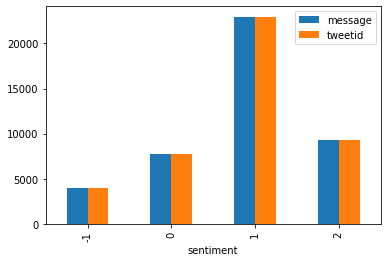

In [ ]:

df.groupby('sentiment').count().plot(kind='bar')

In [ ]:
# To check whether there is NAs 
df.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Word Clouds

In [ ]:
import nltk
from nltk.corpus import stopwords
#print(stopwords.words('english'))

In [ ]:
# We temporaly manually set the list because we got an error with the nltk stopword package. 
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# Following https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud 
# Create stopword list:
#stopwords = set(STOPWORDS) #Error check later!!! 
#stopwords.update(["br", "href"])
stopwords = stopwordlist # Temporary ----
textt = ''.join(review for review in df.message)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: ignored

In [ ]:
# Further Cloud words 
# Split the data set in each cathegory 

news = df[df['sentiment'] == 2]
positive = df[df['sentiment'] == 1]
neutral = df[df['sentiment'] == 0] 
against = df[df['sentiment'] == -1]


In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

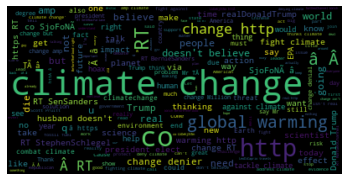

In [ ]:
# Positive
#stopwords = set(STOPWORDS) # We need to fix this problem 
#stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.message)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

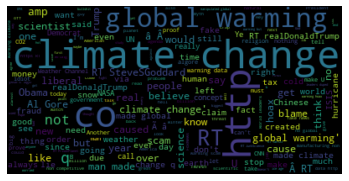

In [ ]:
# Against
pos = " ".join(review for review in against.message)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# We should try to clean it further (check the words: climate change, global...)

# Building the Model 
1: Data Cleaning 

In [ ]:
from wordcloud import WordCloud
#from better_profanity import profanity


!pip install better_profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 1.9 MB/s 


In [ ]:
!pip install stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Function from: https://medium.com/@nikitasilaparasetty/twitter-sentiment-analysis-for-data-science-using-python-in-2022-6d5e43f6fa6e
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

from wordcloud import WordCloud
from better_profanity import profanity
import numpy as np

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [ ]:
# Convert the column 'message' in a list 
# Convert only the tweets into a list

message_list = df.message.to_list()


In [ ]:
# We could try to optimize this next section to make it faster. 
# Because it takes ageeeeeeeees. 


In [ ]:
# Run the list of tweets through this function and display this cleaned list.
# It takes ageeeeees... 
cleaned_df = [clean_tweet(tw) for tw in message_list]
cleaned_df

In [ ]:
cleaned_df = [clean_tweet(tw) for tw in df.message]
cleaned_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
# Just selecting a couple of rows to see whether it works: 
df_test = df.head(10)
df_test

# Making a list 
#test_message_list = df_test.message.to_list()
#cleaned_df_test = [clean_tweet(tw) for tw in test_message_list]

# Works directly from a df 
cleaned_df_test = [clean_tweet(tw) for tw in df_test.message]
cleaned_df_test


,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
5,0,Unamshow awache kujinga na iko global warming ...,793125429418815489
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125430236684289
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,793126558688878592
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,793127097854197761
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...,793127346106753028


Separate the data into train, test and validation split